<a href="https://colab.research.google.com/github/MilaPost/Statistic_python/blob/main/Final%20Project%20for%20the%20Course_%C2%ABPython_for_analitycdata%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
df = pd.read_csv("HR.csv")

git version 2.34.1


**Описание датафрейма**
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [ ]:
#расчет основных статистик для категориальных данных
df_category = ["Work_accident", "left", "promotion_last_5years", "department", "salary"]
for column in df_category:
    unique_values = df[column].unique()
    print(f"Уникальные значения в столбце {column}:\n {unique_values}")
    mode_value = df[column].mode()[0]
    print(f"Мода в столбце {column}: {mode_value}")
    value_counts = df[column].value_counts()
    print(f"Частотный анализ в столбце {column}:\n{value_counts}")
    print("\n")

Уникальные значения в столбце Work_accident:
 [0 1]
Мода в столбце Work_accident: 0
Частотный анализ в столбце Work_accident:
Work_accident
0    12830
1     2169
Name: count, dtype: int64


Уникальные значения в столбце left:
 [1 0]
Мода в столбце left: 0
Частотный анализ в столбце left:
left
0    11428
1     3571
Name: count, dtype: int64


Уникальные значения в столбце promotion_last_5years:
 [0 1]
Мода в столбце promotion_last_5years: 0
Частотный анализ в столбце promotion_last_5years:
promotion_last_5years
0    14680
1      319
Name: count, dtype: int64


Уникальные значения в столбце department:
 ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Мода в столбце department: sales
Частотный анализ в столбце department:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name:

In [ ]:
#расчет основных статистик для непрерывных данных
df_num_cols = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company"]
describe_df = df[df_num_cols].describe()
print("Базовые статистики для непрерывных данных:\n")
print(describe_df.round(2))
print("\n")
print("Медиана:\n", df[df_num_cols].median())
print("\n")
print("Мода:\n", df[df_num_cols].mode())
print("\n")

Базовые статистики для непрерывных данных:

       satisfaction_level  last_evaluation  number_project  \
count            14999.00         14999.00        14999.00   
mean                 0.61             0.72            3.80   
std                  0.25             0.17            1.23   
min                  0.09             0.36            2.00   
25%                  0.44             0.56            3.00   
50%                  0.64             0.72            4.00   
75%                  0.82             0.87            5.00   
max                  1.00             1.00            7.00   

       average_montly_hours  time_spend_company  
count              14999.00            14999.00  
mean                 201.05                3.50  
std                   49.94                1.46  
min                   96.00                2.00  
25%                  156.00                3.00  
50%                  200.00                3.00  
75%                  245.00                4.00

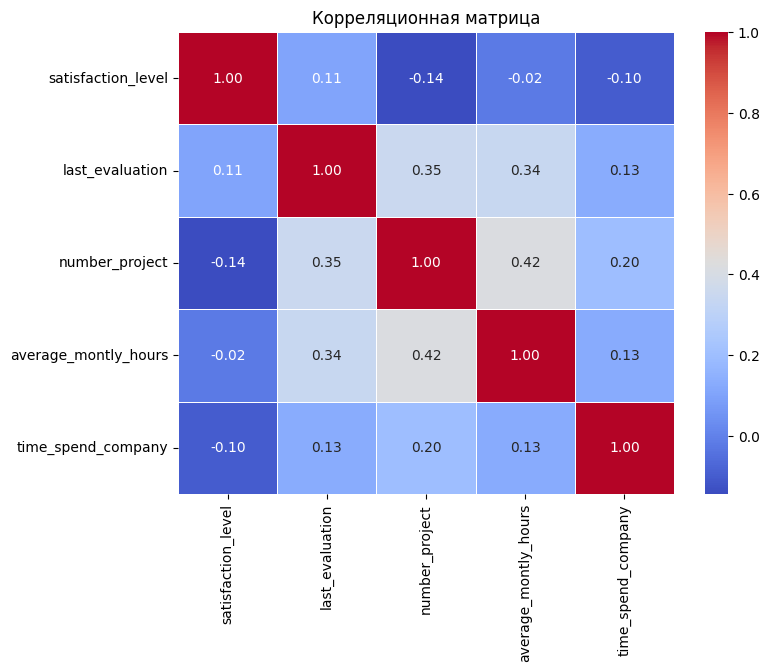

Две самые сильные корреляции:
average_montly_hours  number_project          0.417211
number_project        average_montly_hours    0.417211
dtype: float64

Две самые слабые корреляции:
satisfaction_level  number_project       -0.14297
number_project      satisfaction_level   -0.14297
dtype: float64


In [ ]:
#Рассчитаем и визуализируем корреляционную матрицу для количественных переменных.
#Определим две самые скоррелированные и две наименее скоррелированные переменные
correlation_matrix = df[df_num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

correlation_pairs = correlation_matrix.unstack().sort_values()
highest_corr = correlation_pairs[correlation_pairs < 1.0].nlargest(2)  # Самые сильные корреляции
lowest_corr = correlation_pairs.nsmallest(2)  # Самые слабые корреляции

print("Две самые сильные корреляции:")
print(highest_corr)
print("\nДве самые слабые корреляции:")
print(lowest_corr)

In [ ]:
#Рассчитаем сколько сотрудников работает в каждом департаменте
department_counts = df["department"].value_counts()

print("Количество сотрудников в каждом департаменте:")
print(department_counts)

Количество сотрудников в каждом департаменте:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


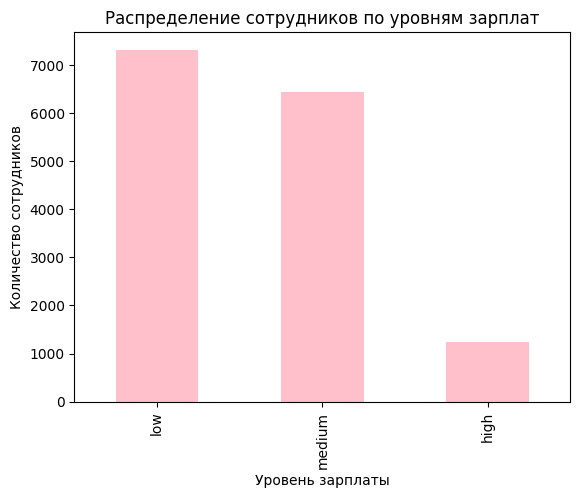

In [ ]:
#Покажем распределение сотрудников по зарплатам
df["salary"].value_counts().plot(kind="bar", color="pink")
plt.title("Распределение сотрудников по уровням зарплат")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Количество сотрудников")
plt.show()

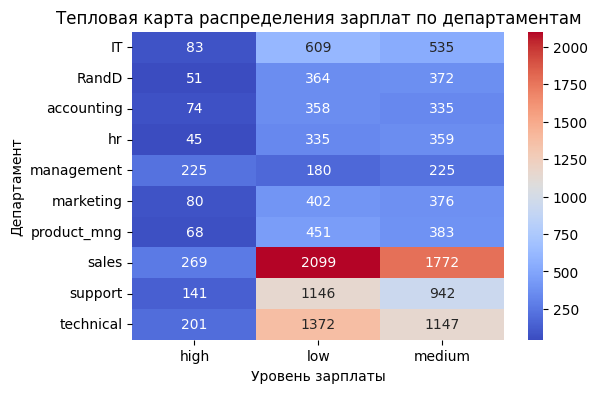

In [18]:
#Покажем распределение сотрудников по зарплатам в каждом департаменте по отдельности
salary_by_department = df.groupby("department")["salary"].value_counts().unstack()
plt.figure(figsize=(6, 4))
sns.heatmap(salary_by_department, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Тепловая карта распределения зарплат по департаментам")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Департамент")
plt.show()

In [20]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
df_high_salary = df[df["salary"] == "high"]
df_low_salary = df[df["salary"] == "low"]
high_salary_hours = df_high_salary["average_montly_hours"]
low_salary_hours = df_low_salary["average_montly_hours"]
#для начала проверим нормальность обоих распределений
stat_high, p_high = st.shapiro(high_salary_hours)
stat_low, p_low = st.shapiro(low_salary_hours)
if p_high < 0.05:
    print("low_hours: распределение не является нормальным.")
else:
    print("low_hours: распределение нормально.")

if p_low < 0.05:
    print("high_hours: распределение не является нормальным.")
else:
    print("high_hours: распределение нормально.")


low_hours: распределение не является нормальным.
high_hours: распределение не является нормальным.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7316.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
#Т.к. распределение обеих выборок не является нормальным, используем тест Манна-Уитни
stat, p = st.mannwhitneyu(low_salary_hours, high_salary_hours)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")
# Вывод результата
if p < 0.05:
    print(" Различие между группами статистически значимо. Это означает, что сотрудники с высоким окладом действительно проводят больше времени на работе.")
else:
    print("Различий нет, то есть размер оклада не влияет на среднее количество отработанных часов.")

Статистика = 4542795.500, p = 0.824
Различий нет, то есть размер оклада не влияет на среднее количество отработанных часов.


In [23]:
#Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
# Доля сотрудников с повышением за последние 5 лет

df_left = df[df["left"] == 1]
df_work = df[df["left"] == 0]
left_promotion_ratio = df_left["promotion_last_5years"].mean()
work_promotion_ratio = df_work["promotion_last_5years"].mean()

print(f"Доля сотрудников с повышением за последние 5 лет среди уволившихся: {left_promotion_ratio:.2%}")
print(f"Доля сотрудников с повышением за последние 5 лет среди работающих: {work_promotion_ratio:.2%}")

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.53%
Доля сотрудников с повышением за последние 5 лет среди работающих: 2.63%


In [33]:
# Средняя степень удовлетворенности
left_satisfaction_level = df_left["satisfaction_level"].mean()
work_satisfaction_level = df_work["satisfaction_level"].mean()

print(f"Средний уровень удовлетворенности работой среди уволившихся: {left_satisfaction_level:.2%}")
print(f"Средний уровень удовлетворенности работой среди работающих: {work_satisfaction_level:.2%}")


Средний уровень удовлетворенности работой среди уволившихся: 44.01%
Средний уровень удовлетворенности работой среди работающих: 66.68%


In [34]:
# Среднее количество проектов
left_number_projects = df_left["number_project"].mean()
work_number_projects = df_work["number_project"].mean()

print(f"Среднее количество проектов среди уволившихся: {left_number_projects:.2}")
print(f"Среднее количество проектов среди работающих: {work_number_projects:.2}")

Среднее количество проектов среди уволившихся: 3.9
Среднее количество проектов среди работающих: 3.8


In [50]:
#Разделить данные на тестовую и обучающую выборки
#Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
#Оценить качество модели на тестовой выборки
X = df[['satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказания
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7533
Confusion Matrix:
 [[2094  200]
 [ 540  166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [56]:
print("Коэффициенты дискриминантных функций:")
print(lda.coef_)

Коэффициенты дискриминантных функций:
[[-4.57147175  0.63783468 -0.22366351  0.00483694  0.22384028 -1.05220355
  -1.11972289]]


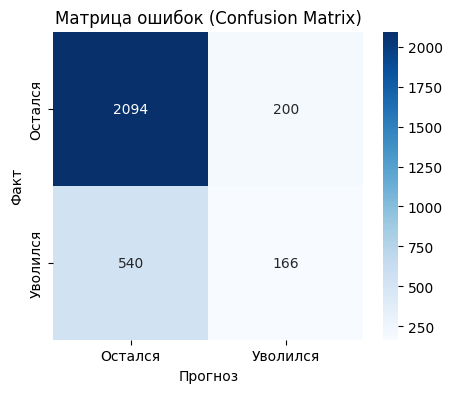

In [55]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Остался', 'Уволился'], yticklabels=['Остался', 'Уволился'])
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок (Confusion Matrix)')
plt.show()